<a href="https://colab.research.google.com/github/paridaabhishek/Alpacatrade/blob/master/Live1MinStreamCompare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install WebSocket
!pip install websocket-client
!pip install alpaca-trade-api

     |████████████████████████████████| 53 kB 857 kB/s 
     |████████████████████████████████| 45 kB 2.5 MB/s 
     |████████████████████████████████| 1.3 MB 31.1 MB/s 
     |████████████████████████████████| 103 kB 66.5 MB/s 
     |████████████████████████████████| 636 kB 72.1 MB/s 
     |████████████████████████████████| 273 kB 66.8 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 271 kB 64.6 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.0.3
    Uninstalling msgpack-1.0.3:
      Successfully uninstalled msgpack-1.0.3


In [2]:
#Import Libreris
import websocket 
import json
from datetime import datetime
import pandas as pd
import numpy as np
from IPython.core.display import JSON

In [3]:
#Map Google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
ticket_interested = (input('Enter The Stock yo wanted to autotrade')).upper()
print(ticket_interested+ ' Will be autotraded now!! Sitback and enjoy your day!!')

listen_message='{"action":"subscribe","bars":["'+ticket_interested+'"]}'
print(listen_message)

Enter The Stock yo wanted to autotradeaapl
AAPL Will be autotraded now!! Sitback and enjoy your day!!
{"action":"subscribe","bars":["AAPL"]}


In [5]:
#Import Credentials. Kept the credential in the file Cred.py under the dir below for security.
import sys
import os
import glob
print(glob.glob("/content/drive/*"))
os.chdir('/content/drive//MyDrive/AlpecaTrading/Config')
#sys.path.append('/content/drive/AlpecaTrading/Config')
print(os.getcwd())
from  Cred import *
print(API_KEY)
print(SECRET_KEY)

['/content/drive/MyDrive']
/content/drive/MyDrive/AlpecaTrading/Config
PKENE1R5LIQR1J3778D0
nT8XMPHULWGvTu4jnDJc6UMK2tSyUAc2YS7npTNV


In [9]:
#Websocket Code
socket = "wss://stream.data.alpaca.markets/v2/sip" #Webscoket given by alpeca for 
#socket = "wss://paper-api.alpaca.markets/stream" #Webscoket given by alpeca for 
#socket = "wss://stream.data.alpaca.markets/v1beta1/crypto"

print(socket.split('/')[-1])

def on_ope_fun(ws):
    print("Opened")
    auth_data = {"action": "auth","key": API_KEY,"secret": SECRET_KEY }  #Key and Secret getting from the Cred file. 
    ws.send(json.dumps(auth_data))
    #listen_message={"action":"subscribe","trades":["BTCUSD"],"quotes":["LTCUSD","ETHUSD"],"bars":["BCHUSD"]}
    #listen_message={"action":"subscribe","trades":["BTCUSD"]}
    #listen_message={"action":"subscribe","bars":["BTCUSD"]}
    listen_message='{"action":"subscribe","bars":["'+ticket_interested+'"]}'
    print(listen_message)
    #listen_message={"action":"subscribe","bars":["AAPL"]}  ### --> Modify based on whatever symbol you want to check
    ws.send(json.dumps(json.loads(listen_message)))


    print('Still Open')

def on_msg_fun(ws,message):
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print("messgae received at"+ current_time)
    print(message)
    print('Strated wring to the steam file')
    testBarWithTradingView(message)
    print('Wrttin  steam file')

def on_clg_fun(ws):
    print("Closed")

sip


In [8]:
def testBarWithTradingView(message):
  messageJson = json.loads(message)
  df = pd.DataFrame(messageJson)
  df.to_csv('/content/drive//MyDrive/AlpecaTrading/DataFiles/StreamFiles/{}.csv'.format(ticket_interested),mode='a', index=False, header=False)



    
  

In [10]:
ws = websocket.WebSocketApp(socket, on_open=on_ope_fun,on_message=on_msg_fun)
ws.run_forever()

Opened
{"action":"subscribe","bars":["AAPL"]}
Still Open
messgae received at18:06:00
[{"T":"success","msg":"connected"}]
Strated wring to the steam file
Wrttin  steam file
messgae received at18:06:01
[{"T":"success","msg":"authenticated"}]
Strated wring to the steam file
Wrttin  steam file
messgae received at18:06:01
[{"T":"subscription","trades":[],"quotes":[],"bars":["AAPL"],"dailyBars":[],"statuses":[],"lulds":[],"corrections":[],"cancelErrors":[]}]
Strated wring to the steam file
Wrttin  steam file
messgae received at18:07:00
[{"T":"b","S":"AAPL","o":175.76,"c":175.835,"h":175.835,"l":175.76,"v":84912,"t":"2022-02-09T18:06:00Z","n":882,"vw":175.797779}]
Strated wring to the steam file
Wrttin  steam file
messgae received at18:08:00
[{"T":"b","S":"AAPL","o":175.8382,"c":175.82,"h":175.895,"l":175.81,"v":115797,"t":"2022-02-09T18:07:00Z","n":1026,"vw":175.850576}]
Strated wring to the steam file
Wrttin  steam file
messgae received at18:09:00
[{"T":"b","S":"AAPL","o":175.8399,"c":175.7

False

#Testing COnclusion . Tested it for AAPL manually , by checking the trading view . Its all working fine 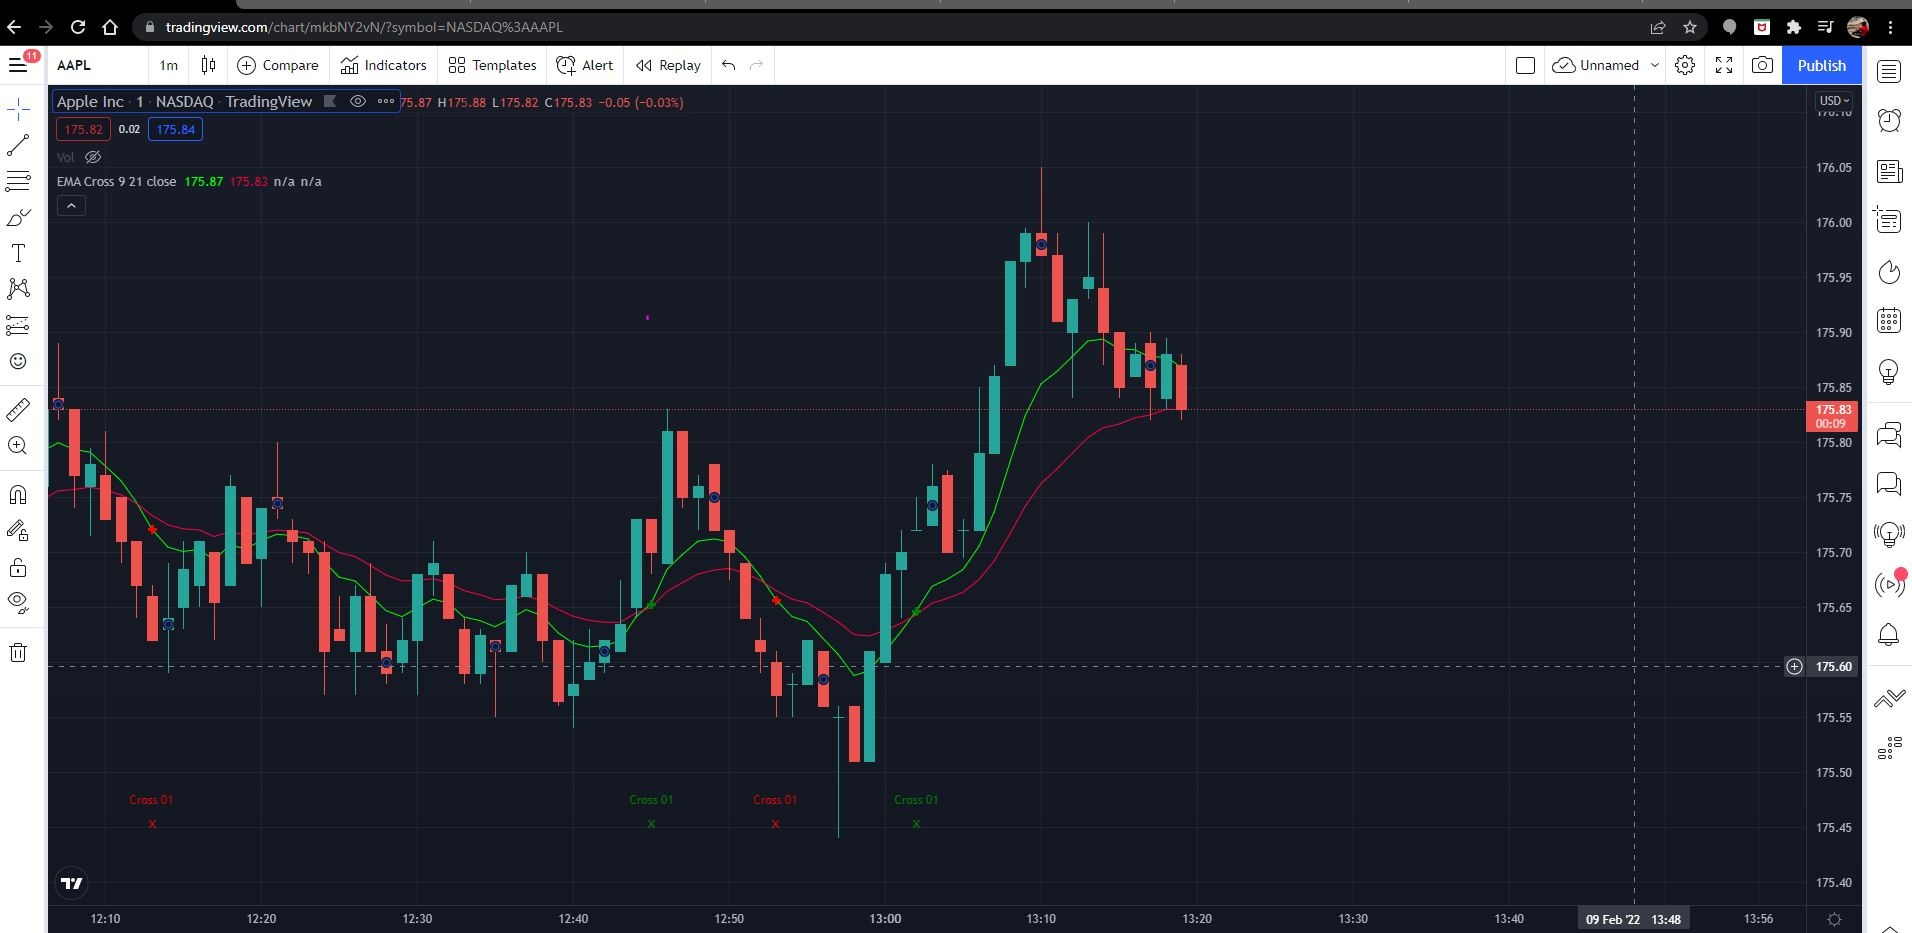